# Comparing averages with different sample sizes

The typical approach to test weather two samples have significant difference in value is the so called t-test. When using test statistics such as t-test, we summarize the variability in the data by a value - for example a mean or a variance, which we presume take on a certain distribution. With such a setup, we can easily test what is the probability of our test statistic assuming a certain value.
The assumption of the Student t-test (the most commonly used one) is that the variances of the samples are equal. There is an alternative to the student t-test, and that is the Welch's unequal variances t-test:
$$
t = \frac{\hat{X}_1 - \hat{X}_2}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}
$$

However, this is also only an approximation of the actual Behrens–Fisher problem. In statistics, the Behrens–Fisher problem, named after Walter Ulrich Behrens and Ronald Fisher, is the problem of interval estimation and hypothesis testing concerning the difference between the means of two normally distributed populations when the variances of the two populations are not assumed to be equal, based on two independent samples. There have been many Bayesian and frequentist approaches suggested for the solution of the Behrens-Fisher problem, of which we will try out a few.

In [6]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [7]:
# We first load the data
sample1 = []
sample2 = []

with open('marie-values.txt') as fin:
    sample1 = map(lambda f: float(f), fin.readline().strip().split(',')[:-1])
    sample2 = map(lambda f: float(f), fin.readline().strip().split(',')[:-1])

(0, 2000)

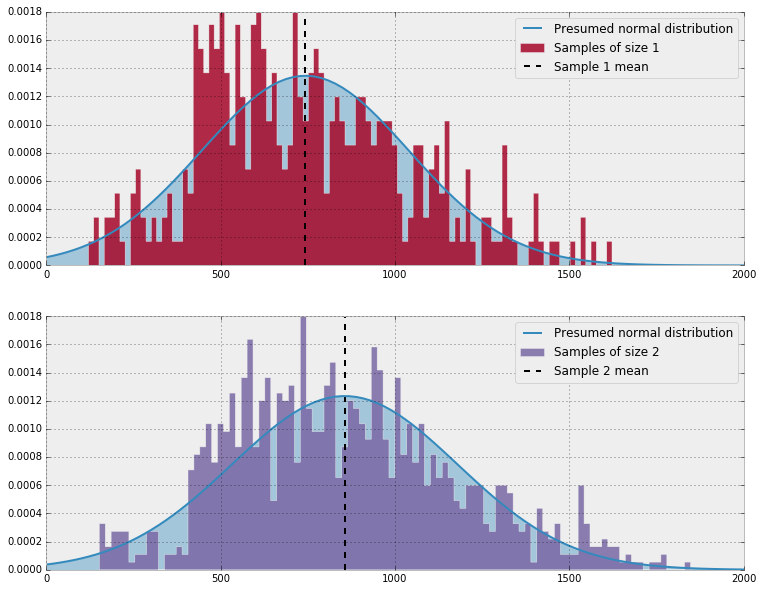

In [8]:
# Let's visually inspect the data
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(211)
#ax.set_autoscaley_on(False)
plt.hist(sample1, histtype='stepfilled', bins=100, alpha=0.85,
         label="Samples of size 1", color="#A60628", normed=True);
mean1 = np.mean(sample1)
std1 = np.std(sample1)
x = np.linspace(0, 2000, 100)
y = stats.norm.pdf(x, mean1, std1)
plt.plot(x, y, label="Presumed normal distribution")
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(mean1, 0, 0.0018, linestyles="--", label='Sample 1 mean')
plt.xlim(0, 2000)
plt.legend()


ax = plt.subplot(212)
#ax.set_autoscaley_on(False)
plt.hist(sample2, histtype='stepfilled', bins=100, alpha=0.85,
         label="Samples of size 2", color="#7A68A6", normed=True);
plt.vlines(np.mean(sample2), 0, 0.0018, linestyles="--", label='Sample 2 mean')
mean2 = np.mean(sample2)
std2 = np.std(sample2)
x = np.linspace(0, 2000, 100)
y = stats.norm.pdf(x, mean2, std2)
plt.plot(x, y, label="Presumed normal distribution")
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.legend()
plt.xlim(0, 2000)

In [9]:
# We use the test available in the scipy stats module

st, pval = stats.ttest_ind(sample1, sample2, equal_var=False)
print 'The p-value is ', pval, '.'

The p-value is  5.14626333559e-10 .


From the p-value of $p = 5.146 \times 10^{-10}$, we can conclude that the sizes do differ significantly, and we reject the null-hypothesis that they are the same.

Of course, when we perform the t-test, the underlying assumption is that the data is normally distributed. Let's test that assumption.

In [10]:
print stats.normaltest(sample1)
print stats.normaltest(sample2)

(12.869643405262503, 0.0016046947897524924)
(28.452979235821982, 6.6300081472775751e-07)


We tested wether the data is normally distributed, the null hypothesis being that it is. Judging from the p-values of the normality test, it seems we can safely say that it is not. This means we have to employ a different approach.

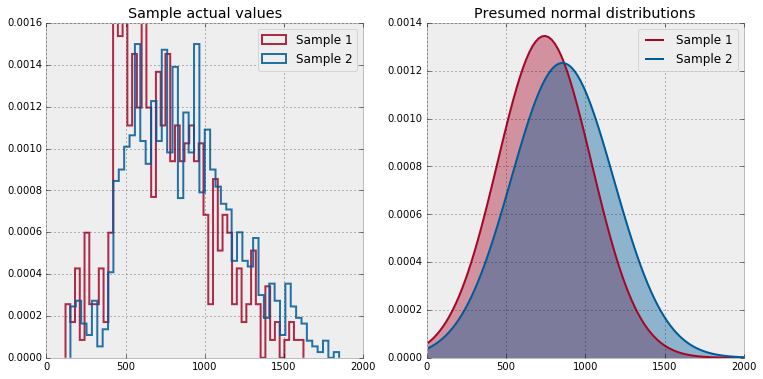

In [11]:
figsize(12.5, 6)

ax = plt.subplot(121)
#ax.set_autoscaley_on(False)
plt.hist(sample1, histtype='step', bins=50, alpha=0.85,
         label="Sample 1", color="#A60628", normed=True, linewidth=2);
plt.hist(sample2, histtype='step', bins=50, alpha=0.85,
         label="Sample 2", color="#005B9A", normed=True, linewidth=2);
plt.xlim(0, 2000)
plt.title('Sample actual values')
plt.legend()

ax = plt.subplot(122)

y = stats.norm.pdf(x, mean1, std1)
plt.plot(x, y, label="Sample 1", color='#A60628')
plt.fill_between(x, 0, y, color="#A60628", alpha=0.4)
y = stats.norm.pdf(x, mean2, std2)
plt.plot(x, y, label="Sample 2", color='#005B9A')
plt.fill_between(x, 0, y, color="#005B9A", alpha=0.4)
plt.title('Presumed normal distributions')
plt.legend()


In [16]:
import best
from pymc import MCMC

data = {'sample1': sample1, 'sample2': sample2}
model = best.make_model(data)

M = MCMC(model)
M.sample(iter=110000, burn=10000)

[****************100%******************]  110000 of 110000 complete


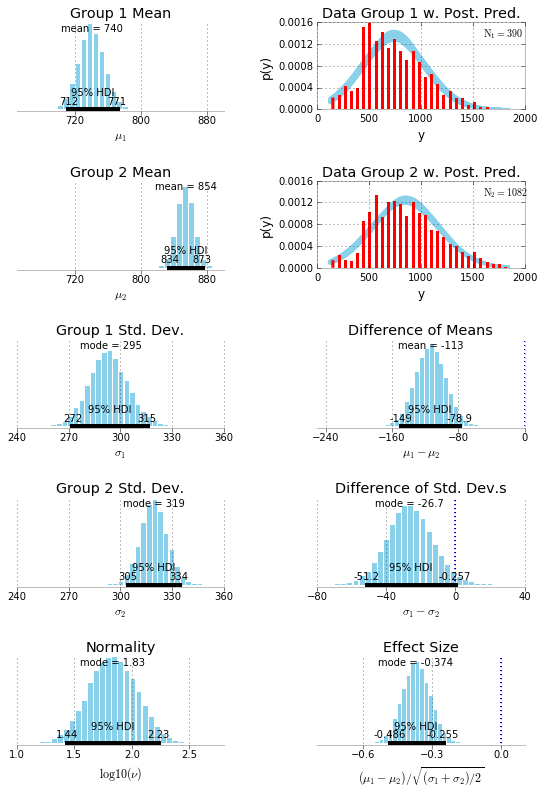

In [17]:
import best.plot
fig = best.plot.make_figure(M)
fig.savefig('marie-samples.png',dpi=70)